In [1]:
import numpy as np

def rule1(c, erA):
    ret = abs(c) * erA
    return ret

def rule2(c, m, A, erA):
    ret = abs(c*m*A**(m-1)) * erA
    return ret

def rule3(erA, erB):
    ret = np.sqrt(erA**2 + erB**2)
    return ret
    
def rule4(m, n, A, B, erA, erB):
    ret = np.sqrt((m*(erA/A))**2 + (n * (erB/B)**2))
    return ret


In [14]:
m25 = [2.287, 2.254, 2.117, 2.179, 2.176, 2.019] # 10**-3 
m45 = [6.680, 6.407, 6.405, 6.291, 6.380, 6.397] # 10**-3
m65 = [1.125, 1.117, 1.065, 1.078, 1.132, 1.110] # 10**-2
m85 = [1.602, 1.595, 1.577, 1.609, 1.622, 1.546] # 10**-2
m105 = [2.066, 2.052, 2.095, 2.106, 2.075, 2.058] # 10**-2

m25avg = np.mean(m25)
m45avg = np.mean(m45)
m65avg = np.mean(m65)
m85avg = np.mean(m85)
m105avg = np.mean(m105)

masserror = 0.1
radiuserror = 0.02

Inertia = (.5) * 1.4369 * .228**2

Ini_plus = Inertia + rule4(1, 1, 1436.9, .228, 0.1, 0.02)
Ini_neg = Inertia - rule4(1, 1, 1436.9, .228, 0.1, 0.02)

tension1 = .025 * (9.8 - m25avg * 10**-3)
tension2 = .045 * (9.8 - m45avg * 10**-3)
tension3 = .065 * (9.8 - m65avg * 10**-2)
tension4 = .085 * (9.8 - m85avg * 10**-2)
tension5 = .105 * (9.8 - m105avg * 10**-2)

torq1 = 0.228 * tension1 
torq2 = 0.228 * tension2
torq3 = 0.228 * tension3
torq4 = 0.228 * tension4
torq5 = 0.228 * tension5

stupid1 = m25avg*10**-3
stupid2 = m45avg*10**-3
stupid3 = m65avg*10**-2
stupid4 = m85avg*10**-2
stupid5 = m105avg*10**-2
stupid6 = np.std(m25) /1000
stupid7 = np.std(m45) / 1000
stupid8 = np.std(m65) / 100
stupid9 = np.std(m85) / 100
stupid10 = np.std(m105) / 100

er_torq1 = torq1 * rule4(1, 1, stupid1, 0.025, stupid6, 0.1)
er_torq2 = torq2 * rule4(1, 1, stupid2, 0.045, stupid7, 0.1)
er_torq3 = torq3 * rule4(1, 1, stupid3, 0.065, stupid8, 0.1)
er_torq4 = torq4 * rule4(1, 1, stupid4, 0.085, stupid9, 0.1)
er_torq5 = torq5 * rule4(1, 1, stupid5, 0.105, stupid10, 0.1)

print("Errors in torq:", er_torq1, er_torq2, er_torq3, er_torq4, er_torq5)
print("Error In I:+", Ini_plus, "-", Ini_neg)

Errors in torq: 0.2234019335207446 0.22330136320458854 0.22321152633948899 0.2230963487798293 0.2229775696260084
Error In I:+ 0.12506723065277184 - -0.050371421052771835


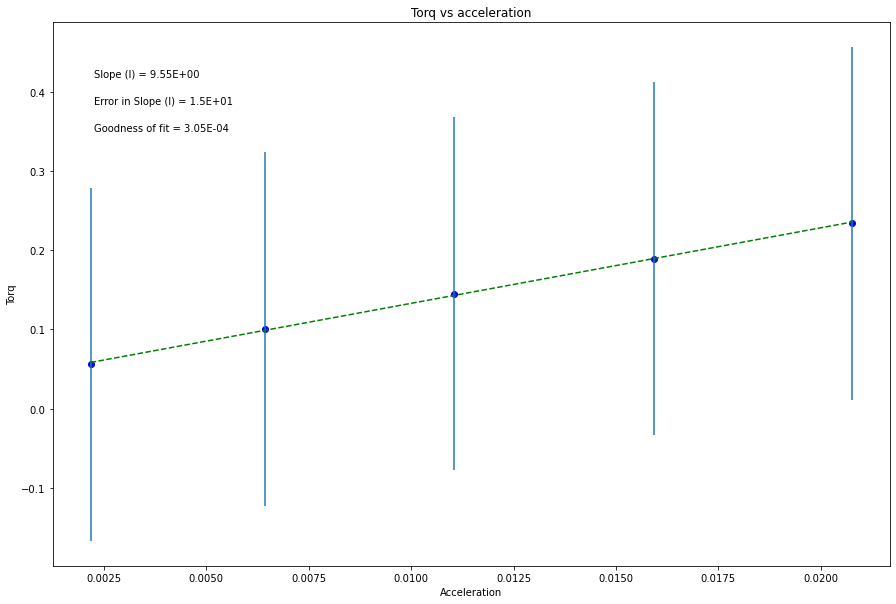

In [15]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
conversion = []
conversion.append(m25avg * 10**-3)
conversion.append(m45avg * 10**-3)
conversion.append(m65avg * 10**-2)
conversion.append(m85avg * 10**-2)
conversion.append(m105avg * 10**-2)
a = np.array(conversion) #what are units?
torq = np.array([torq1, torq2, torq3, torq4, torq5]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
Errorintorq = np.array([er_torq1, er_torq2, er_torq3, er_torq4, er_torq5])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = a   #this should be the array you want to plot on the x axis
y = torq
dy = Errorintorq  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Acceleration')
plt.ylabel('Torq')
plt.title('Torq vs acceleration')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (I) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (I) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
